# San Francisco Crime Dataset: EDA

이 노트북에서는 캐글의 San Francisco Crime 데이터에 대한 탐사분석을 수행할 것이다.

알고 싶은 것들

- 시계열 데이터에 대한 분석
- 좌표 데이터에 대한 분석
- 주소 데이터에 대한 분석
- 범죄 종류와 Feature와의 관계

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
train = pd.read_csv("train.csv", parse_dates=["Dates"])

In [76]:
#train data 확인
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


8개의 Feature와 1개의 label(Category) Missing 된 데이터는 없음

In [78]:
#좌표데이터 기술 통계
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


Y값에 outlier가 있다는 것을 알 수 있다. 평균이 약38 표준편차가 약 0.5 하지만 Max는 90

## 시계열 데이터 분석

In [79]:
#년,월,일,시,분 데이터 생성
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['hour'] = train['Dates'].dt.hour
train['min'] = train['Dates'].dt.minute

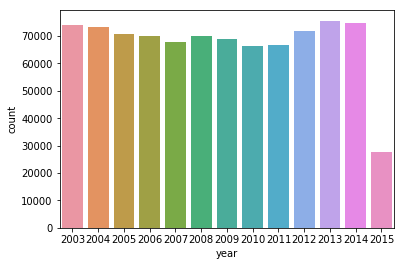

In [80]:
# 년도별 범죄발생 건수 
sns.countplot(train["year"])

범죄발생건주의 특정한 상승 및 하락 패턴은 없다. 하지만 2015년의 발생건수가 전 년도들에 비해 낮은 것으로 보아 2015년도의 모든 월이 집계 된것이 아니라는 것을 추론할 수 있다.

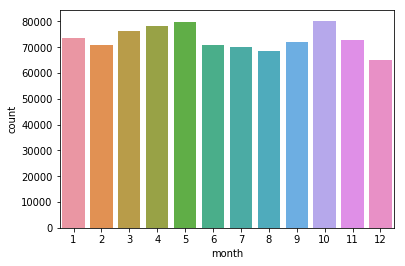

In [81]:
sns.countplot(train["month"])

In [82]:
train['year-month'] = train['year'].astype(str) + '-' + train['month'].astype(str)

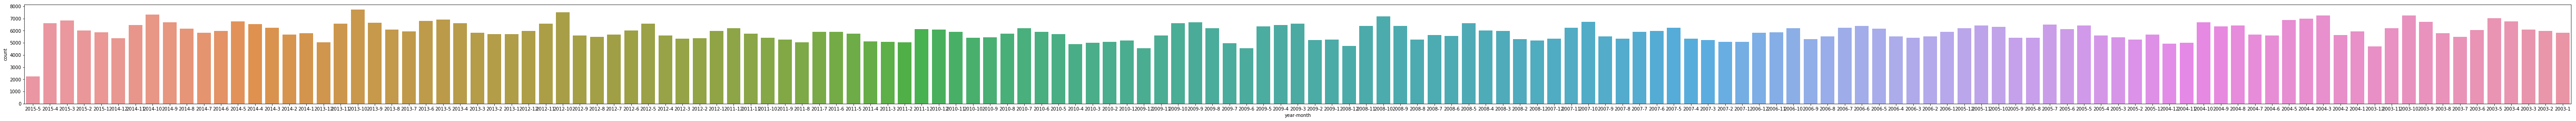

In [83]:
plt.figure(figsize=(100,4))
sns.countplot(train['year-month'])

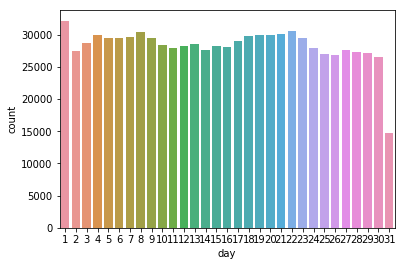

In [84]:
sns.countplot(train["day"])

1일에 다른 날보다 상대적으로 약간 높다. 이유가 무엇인가? 

31일이 낮은 이유는 월에 31일 포함된 날이 많지 않기 때문이다.

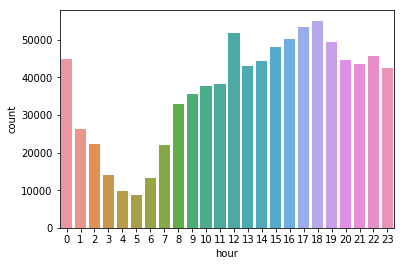

In [85]:
sns.countplot(train["hour"])

사람들이 없는 새벽시간(1 ~ 5)에는 범죄 발생건수가 낮다. 

-> 시간대별 범죄의 종류가 다르지 않을까?

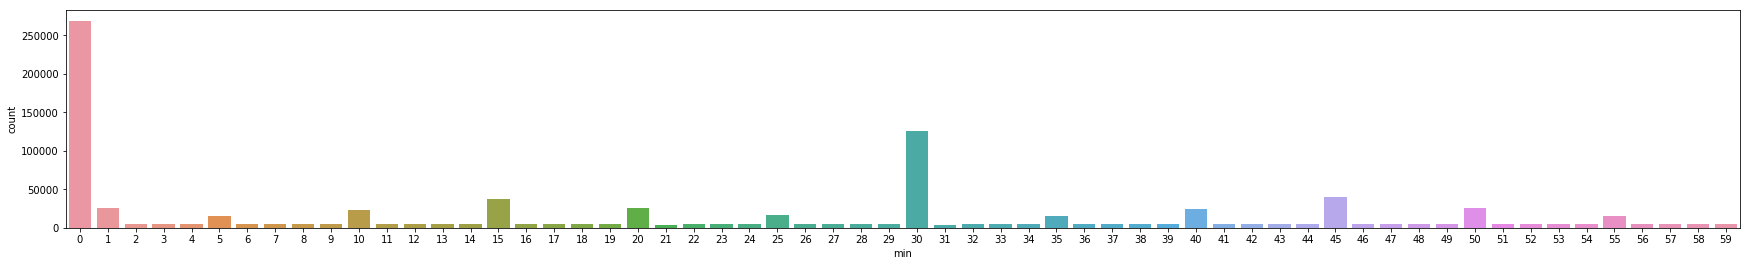

In [86]:
plt.figure(figsize=(30,4))
sns.countplot(train["min"])

특이하게 0분과 30분에 범죄 발생건수가 많다.

-> 정확한 범죄발생시간을 모르기에 기록할때 대충 0분또는 30분이라고 했을수 있다.

#### 시간대별 범죄 종류

In [87]:
down = train.loc[(train['hour']>=1)&(train['hour']<=6),:]
morning = train.loc[(train['hour']>=7)&(train['hour']<=11),:]
after = train.loc[(train['hour']>=12)&(train['hour']<=17),:]
night = train.loc[(train['hour']>=18)&(train['hour']<=23),:]

In [88]:
down["Category"].value_counts()[0:10]

LARCENY/THEFT     13081
OTHER OFFENSES    13064
ASSAULT           11892
NON-CRIMINAL       8664
VANDALISM          6709
VEHICLE THEFT      4921
ROBBERY            4865
BURGLARY           4860
WARRANTS           4557
DRUG/NARCOTIC      3581
Name: Category, dtype: int64

In [89]:
morning["Category"].value_counts()[0:10]

LARCENY/THEFT     28144
OTHER OFFENSES    26390
NON-CRIMINAL      21123
ASSAULT           13532
DRUG/NARCOTIC     10315
WARRANTS           8923
BURGLARY           8446
VEHICLE THEFT      8439
MISSING PERSON     7552
SUSPICIOUS OCC     6892
Name: Category, dtype: int64

In [90]:
after["Category"].value_counts()[0:10]

LARCENY/THEFT     60869
OTHER OFFENSES    42453
NON-CRIMINAL      33659
ASSAULT           23848
DRUG/NARCOTIC     22075
WARRANTS          15080
VEHICLE THEFT     14464
BURGLARY          11391
VANDALISM         11125
SUSPICIOUS OCC    11118
Name: Category, dtype: int64

In [91]:
night["Category"].value_counts()[0:10]

LARCENY/THEFT     65787
OTHER OFFENSES    36900
NON-CRIMINAL      24553
VEHICLE THEFT     23922
ASSAULT           23313
VANDALISM         17965
DRUG/NARCOTIC     16297
WARRANTS          11974
BURGLARY          10693
ROBBERY            8540
Name: Category, dtype: int64

시간대별로 Top 1,2는 같다 순위가 낮은 카테고리에서 약간의 발생건수 차이가 존재한다.

### 좌표데이터에 대한 분석

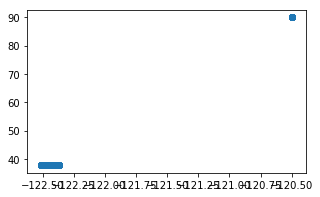

In [92]:
plt.figure(figsize=(5,3))
plt.scatter(train['X'],train["Y"])

y가 90인 데이터는 무엇인가?

In [93]:
train.loc[train['Y']==90,:]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,min,year-month
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,2005-12
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,2005-12
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,2005-12
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,2005-12
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,2005-11
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0,2005,11,28,16,4,2005-11
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0,2005,11,14,9,20,2005-11
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0,2005,11,2,20,30,2005-11
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,2005,10,23,20,0,2005-10
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,2005,10,23,18,11,2005-10


좌표는 같으나 주소는 다르다.문제점이 있다는 것을 알 수 있다.

상대적으로 옛날 데이터이다. 2003 ~ 2005 데이터

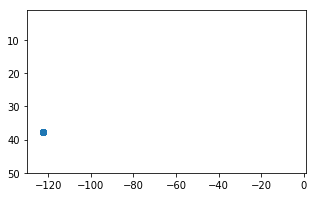

In [94]:
plt.figure(figsize=(5,3))
plt.xlim(-130)
plt.ylim(50)
plt.scatter(train['X'],train["Y"])

아웃라이어 빼고 한 곳에 밀집되어있다. -> 하나의 도시

### 주소 데이터에 대한 분석

In [95]:
# 2만3천개의 유니크한 주소데이터가 있다.
len(train["Address"].unique())

23228

주소의 형태: ST / ST, AV / ST, ST / AV, Block / AV, Block / WY, Block / BL

In [103]:
train[train['Address'] == 'OAK ST / LAGUNA ST'][0:5]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,min,year-month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,2015-5
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,2015-5
12956,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,3,8,8,50,2015-3
27204,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Monday,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,1,5,20,0,2015-1
65580,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,2014,6,29,17,12,2014-6


In [102]:
train[train['Address'] == 'LAGUNA ST / OAK ST'][0:5]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,min,year-month
106008,2013-12-11 16:55:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2013,12,11,16,55,2013-12
154395,2013-04-30 11:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2013,4,30,11,0,2013-4
219632,2012-06-03 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2012,6,3,23,0,2012-6
283267,2011-07-01 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Friday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,2011,7,1,0,1,2011-7
314544,2011-01-12 09:15:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,2011,1,12,9,15,2011-1


같은 주소지만 주소의 순서만 바뀐것이 있다. 중복된 것을 바로잡아야한다.

In [105]:
# 중복제거 함수생성
def clean_up_duplicated_address(address):
    if not "/" in address:
        return address

    address1, address2 = address.split("/")

    address1 = address1.strip()
    address2 = address2.strip()

    if address1 > address2:
        return "{0} / {1}".format(address2, address1)
    else:
        return "{0} / {1}".format(address1, address2)

In [108]:
#적용
train['Address'] = train["Address"].apply(clean_up_duplicated_address)

중복제거 후, 주소를 블록이냐 아니냐를 기준으로 나누어본다.

In [112]:
train.loc[train["Address"].str.contains("Block of"), "AddressType"] = "Block"
train.loc[~train["Address"].str.contains("Block of"), "AddressType"] = "nonBlock"

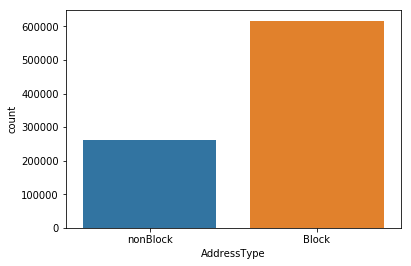

In [114]:
sns.countplot(train["AddressType"])

Block 타입의 주소가 약 3배 많다

In [117]:
#범죄 카테고리
len(train['Category'].unique())

39

In [127]:
train.loc[train["AddressType"]=='Block','Category'].value_counts()[0:5]

LARCENY/THEFT     117913
NON-CRIMINAL       68377
OTHER OFFENSES     65855
ASSAULT            61446
BURGLARY           36316
Name: Category, dtype: int64

In [128]:
train.loc[train["AddressType"]=='nonBlock','Category'].value_counts()[0:5]

OTHER OFFENSES    60327
LARCENY/THEFT     56987
NON-CRIMINAL      23927
DRUG/NARCOTIC     19919
VEHICLE THEFT     19585
Name: Category, dtype: int64

Block 유무에 의해서 발생하는 범죄종류가 다르다는 것을 확일 할 수 있다.